第2-4课将在研究环境中进行。 要在Research中设置，请创建一个新`Notebook`。

问题点：

- symbols 输出格式，更改为tuple？
- 测试 dataframe.xs

In [1]:
%matplotlib inline

# 数据探索

Research从1991年到最近完成的交易日提供了函数来查询3000多个股票的定价，成交量和收益率数据。这些函数接收资产（或资产列表）以及开始和结束日期等参数，返回按日期索引的`pandas Series`（或`DataFrame`）。

定义我们想要探索的时间段，并使用`returns`函数来查询MDJT('000333')的数据：

## 当天涨跌幅

In [2]:
# Research environment functions
from zipline.research import returns, symbol, symbols

# Select a time range to inspect
period_start = '2018-01-01'
period_end = '2018-5-18'

# Query returns data for AAPL
# over the selected time range
mdjt_returns = returns(
    '000333',
    start=period_start,
    end=period_end,
)

# Display first 10 rows
mdjt_returns.head(10)

,美的集团(000333)
2018-01-02 00:00:00+00:00,0.017128
2018-01-03 00:00:00+00:00,-0.010289
2018-01-04 00:00:00+00:00,0.026714
2018-01-05 00:00:00+00:00,0.011697
2018-01-08 00:00:00+00:00,-0.005189
2018-01-09 00:00:00+00:00,0.031565
2018-01-10 00:00:00+00:00,0.018164
2018-01-11 00:00:00+00:00,-0.015525
2018-01-12 00:00:00+00:00,0.019803
2018-01-15 00:00:00+00:00,0.005906


In [3]:
symbols('000333')

[美的集团(000333)]

In [4]:
symbols(['000333','600645'])

[美的集团(000333), 中源协和(600645)]

## 设置`periods`值，查询多日涨跌幅

In [5]:
mdjt_returns = returns(
    ['000333'],
    start=period_start,
    end=period_end,
    periods=2,
)

# Display first 10 rows
mdjt_returns.head(10)

,美的集团(000333)
2018-01-02 00:00:00+00:00,0.014936
2018-01-03 00:00:00+00:00,0.006663
2018-01-04 00:00:00+00:00,0.016150
2018-01-05 00:00:00+00:00,0.038723
2018-01-08 00:00:00+00:00,0.006447
2018-01-09 00:00:00+00:00,0.026212
2018-01-10 00:00:00+00:00,0.050303
2018-01-11 00:00:00+00:00,0.002356
2018-01-12 00:00:00+00:00,0.003970
2018-01-15 00:00:00+00:00,0.025826


## 多只股票

In [6]:
mdjt_returns = returns(
    ['000333', '600645'],
    start=period_start,
    end=period_end,
    periods=2,
)

# Display first 10 rows
mdjt_returns.tail(10)

,美的集团(000333),中源协和(600645)
2018-05-07 00:00:00+00:00,0.007692,0.051522
2018-05-08 00:00:00+00:00,0.054795,0.043478
2018-05-09 00:00:00+00:00,0.029580,0.037416
2018-05-10 00:00:00+00:00,0.008905,0.015789
2018-05-11 00:00:00+00:00,-0.003707,-0.020610
2018-05-14 00:00:00+00:00,0.015815,-0.098446
2018-05-15 00:00:00+00:00,0.027349,-0.074967
2018-05-16 00:00:00+00:00,-0.015206,0.031130
2018-05-17 00:00:00+00:00,-0.038030,0.025118
2018-05-18 00:00:00+00:00,-0.009375,-0.010683


# 替代数据

除定价和交易量数据外，Quantopian还整合了包括企业基本面，股票情绪分析和宏观经济指标等在内的大量替代数据集。您可以在Quantopian的数据页面找到50多个数据集的完整列表。

我们在本教程中的目标是建立一个基于情绪数据选择和交易资产的算法，因此我们来看看PsychSignal的StockTwits Trader Mood数据集。 PsychSignal的数据集根据发布在股票交易平台Stocktwits上的消息的总体情绪，每天为股票分配牛熊分数。

我们可以从stocktwits数据集中检查消息量和情绪得分（公牛减去熊）列。我们将使用Quantopian的Pipeline API查询数据，这是一个反复使用的功能强大的工具，用于访问和分析Research中的数据。您将在下一课和稍后的教程中了解更多有关Pipeline API的内容。现在，您只需要知道以下代码使用数据管道查询stocktwits并返回数据，并绘制AAPL的结果：

**用注册资本十分位数数据替代演示**

In [7]:
# Pipeline imports
from zipline.research import run_pipeline
from zipline.pipeline.data import CNEquityPricing,EquityPricing
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import Returns
from zipline.pipeline.fundamentals import Fundamentals

In [8]:
# Pipeline definition
def make_pipeline():

    return Pipeline(
        columns={
            'close': CNEquityPricing.close.latest,
        },
    )

# Pipeline execution
data_output = run_pipeline(
    make_pipeline(),
    period_start,
    period_end
)

data_output.tail()

close
2018-05-18 00:00:00+00:00 洛阳钼业(603993)   8.10
                          中新科技(603996)  18.98
                          继峰股份(603997)  11.45
                          方盛制药(603998)  10.07
                          读者传媒(603999)   7.38

In [9]:
# Pipeline definition
def make_pipeline():

    returns = Returns(window_length=2)
    rating = Fundamentals.rating.投资评级.latest

    return Pipeline(
        columns={
            'daily_returns': returns,
            'rating': rating,
        }, )


# Pipeline execution
data_output = run_pipeline(make_pipeline(), period_start, period_end)

data_output.tail()

daily_returns  rating
2018-05-18 00:00:00+00:00 洛阳钼业(603993)      -0.009780   -9999
                          中新科技(603996)      -0.003151   -9999
                          继峰股份(603997)       0.000000   -9999
                          方盛制药(603998)       0.012060   -9999
                          读者传媒(603999)      -0.002703   -9999

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE821E46A0>,
      dtype=object)

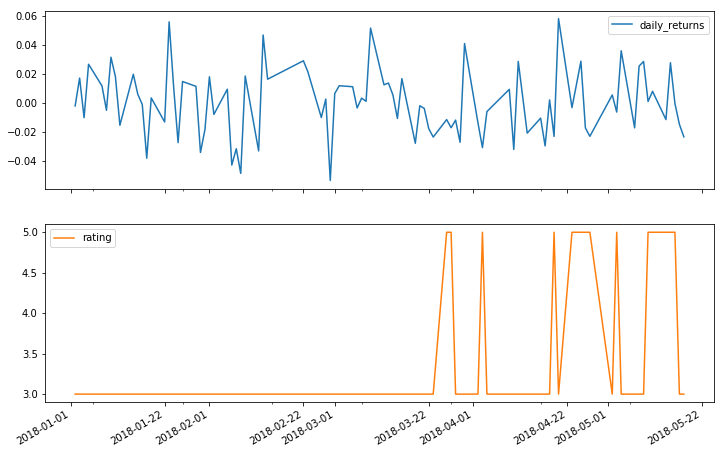

In [10]:
# 过滤出美的集团
aapl_output = data_output.xs(symbol('000333'), level=1)

# Plot results for AAPL
aapl_output.plot(
    subplots=True, figsize=(12, 8))

在探索数据集时，尝试寻找可能成为交易策略基础的模式。 例如，上面的图表显示了日常回报和stocktwits消息量之间的一些匹配峰值，在某些情况下，回报峰值的方向与AAPL的情绪分数的方向相匹配。 这看起来很有趣，我们应该进行更严格的统计测试来确认我们的假设。
在下一课中，我们将更深入地介绍Pipeline API。